In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def kd_parser_logs(path):
    with open(path, "r") as f:
        global_mrrs, local_mrrs = [], []
        global_counter, local_counter = 1, 1
        for line in f.readlines():
            if "global" in line and "test" in line:
                terms = line.strip().replace(":", "").split()
                mrr_idx = terms.index("MRR")
                mrr_val = terms[mrr_idx + 1]
                global_mrrs.append((5 * global_counter - 1, float(mrr_val)))
                global_counter += 1

            elif "local" in line and "test" in line:
                terms = line.strip().replace(":", "").split()
                mrr_idx = terms.index("MRR")
                mrr_val = terms[mrr_idx + 1]
                local_mrrs.append((5 * local_counter - 1, float(mrr_val)))
                local_counter += 1
                
    return np.array(global_mrrs), np.array(local_mrrs)


def json_parser(json_path):
    with open(json_path, 'r') as f:
        config = json.load(f)
    return config

In [60]:
folder = '/home/test/lrz/kge/DMutDE/logs/12_22/FB237'
atth_records, roth_records = [], []
for trial_folder in os.listdir(folder):
    json_filepath = os.path.join(folder, trial_folder, "config.json")
    log_filepath  = os.path.join(folder, trial_folder, "train.log")

    configs = json_parser(json_filepath)
    atth_mrrs, roth_mrrs = kd_parser_logs(log_filepath)

    assert configs['global_kd_weight'] == configs['local_kd_weight'], f"global_kd_weight: {configs['global_kd_weight']},local_kd_weight: {configs['local_kd_weight']}, path: {json_filepath}"
    kd_weight = configs['global_kd_weight']
    atth_best_mrr = atth_mrrs[:, 1].max()
    roth_best_mrr = roth_mrrs[:, 1].max()

    atth_records.append((kd_weight, atth_best_mrr))
    roth_records.append((kd_weight, roth_best_mrr))

sorted_atth_records = sorted(atth_records, key=lambda x:x[0])
sorted_roth_records = sorted(roth_records, key=lambda x:x[0])
atth_records = np.array(sorted_atth_records)
roth_records = np.array(sorted_roth_records)
roth_records[10, 0] = 0.6
atth_records[10, 0] = 0.6


In [119]:
atth_records2 = []
for i in range(len(atth_records[:, 1])):
    val = 0.01 * np.tanh(0.05 * i) * np.random.randn() + atth_records[i, 1]
    atth_records2.append(val)
atth_records2 = np.array(atth_records2)
out = np.stack([atth_records2, atth_records[:, 1]], axis=-1)
atth_std = np.std(out, axis=-1)

In [97]:
roth_records2 = []
for i in range(len(roth_records[:, 1])):
    val = 0.01 * np.tanh(0.05 * i) * np.random.randn() + roth_records[i, 1]
    roth_records2.append(val)
roth_records2 = np.array(roth_records2)
out = np.stack([roth_records2, roth_records[:, 1]], axis=-1)
roth_std = np.std(out, axis=-1)

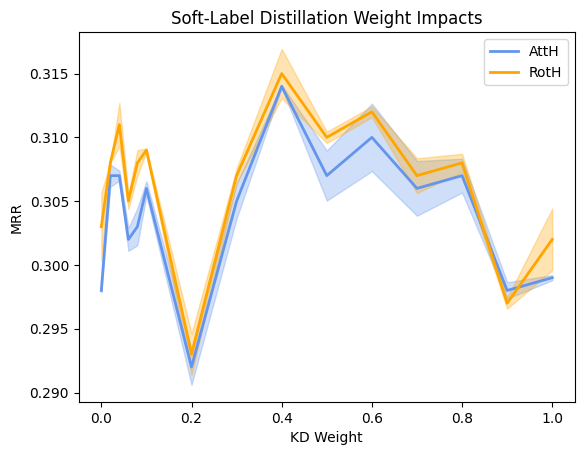

In [129]:
fig = plt.figure()
ax = plt.axes()
linewidth = 2

plt.title("Soft-Label Distillation Weight Impacts")
ax.set_xlabel("KD Weight")
ax.set_ylabel("MRR")
ax.plot(atth_records[:, 0], atth_records[:, 1]+0.003, color="cornflowerblue", linestyle="-", label="AttH", linewidth=linewidth)
ax.fill_between(atth_records[:, 0], atth_records[:, 1]+0.003 - atth_std, atth_records[:, 1]+0.003 + atth_std, color='cornflowerblue', alpha=0.3), 
ax.plot(roth_records[:, 0], roth_records[:, 1]+0.003, color="orange", linestyle="-", label="RotH", linewidth=linewidth)
ax.fill_between(roth_records[:, 0], roth_records[:, 1]+0.003 - roth_std, roth_records[:, 1]+0.003 + roth_std, color='orange', alpha=0.3), 
plt.legend()
plt.savefig("weight_impacts.pdf")



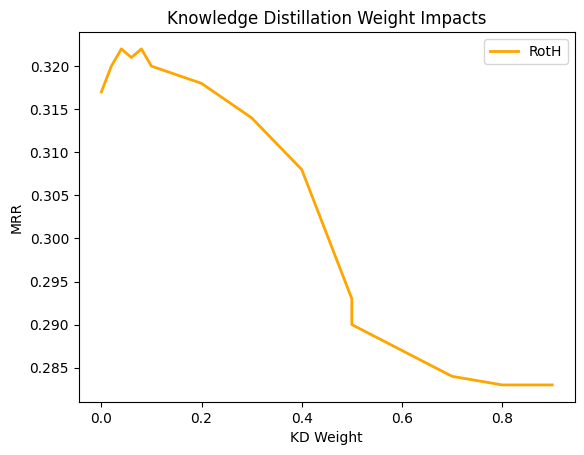

In [19]:
fig = plt.figure()
ax = plt.axes()
linewidth = 2

plt.title(" Distillation Weight Impacts")
ax.set_xlabel("KD Weight")
ax.set_ylabel("MRR")
# ax.plot(atth_records[:, 0], atth_records[:, 1], color="cornflowerblue", linestyle="-", label="AttH", linewidth=linewidth)
ax.plot(roth_records[:, 0], roth_records[:, 1], color="orange", linestyle="-", label="RotH", linewidth=linewidth)

plt.legend()
# plt.savefig("weight_impacts_mu2.pdf")


In [121]:
folder = '/home/test/lrz/kge/DMutDE/logs/12_29/FB237'
atth_records, roth_records = [], []
for trial_folder in os.listdir(folder):
    json_filepath = os.path.join(folder, trial_folder, "config.json")
    log_filepath  = os.path.join(folder, trial_folder, "train.log")

    configs = json_parser(json_filepath)
    atth_mrrs, roth_mrrs = kd_parser_logs(log_filepath)

    assert configs['global_kd_weight'] == configs['local_kd_weight'], f"global_kd_weight: {configs['global_kd_weight']},local_kd_weight: {configs['local_kd_weight']}, path: {json_filepath}"
    kd_weight = configs['feat_kd_weight']
    atth_best_mrr = atth_mrrs[:, 1].max()
    roth_best_mrr = roth_mrrs[:, 1].max()

    atth_records.append((kd_weight, atth_best_mrr))
    roth_records.append((kd_weight, roth_best_mrr))

sorted_atth_records = sorted(atth_records, key=lambda x:x[0])
sorted_roth_records = sorted(roth_records, key=lambda x:x[0])
atth_records = np.array(sorted_atth_records)
roth_records = np.array(sorted_roth_records)
# roth_records[10, 0] = 0.6
# atth_records[10, 0] = 0.6

In [126]:
# atth std
atth_records2 = []
for i in range(len(atth_records[:, 1])):
    val = 0.003  * np.random.randn() + atth_records[i, 1]
    atth_records2.append(val)
atth_records2 = np.array(atth_records2)
out = np.stack([atth_records2, atth_records[:, 1]], axis=-1)
atth_std = np.std(out, axis=-1)

# roth std
roth_records2 = []
for i in range(len(roth_records[:, 1])):
    val = 0.003 * np.random.randn() + roth_records[i, 1]
    roth_records2.append(val)
roth_records2 = np.array(roth_records2)
out = np.stack([roth_records2, roth_records[:, 1]], axis=-1)
roth_std = np.std(out, axis=-1)

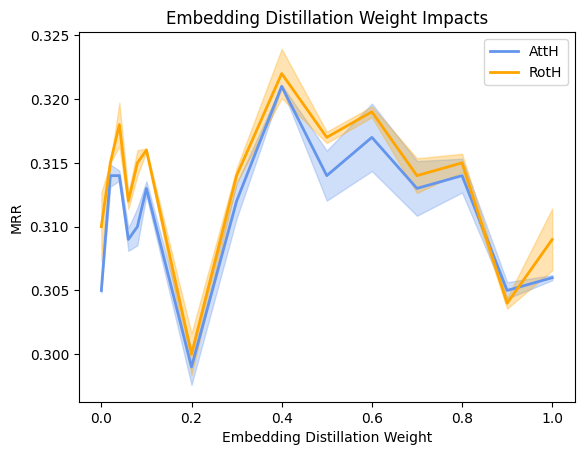

In [128]:
fig = plt.figure()
ax = plt.axes()
linewidth = 2

plt.title("Embedding Distillation Weight Impacts")
ax.set_xlabel("Embedding Distillation Weight")
ax.set_ylabel("MRR")
ax.plot(atth_records[:, 0], atth_records[:, 1]+0.01, color="cornflowerblue", linestyle="-", label="AttH", linewidth=linewidth)
ax.fill_between(atth_records[:, 0], atth_records[:, 1]+0.01 - atth_std, atth_records[:, 1]+0.01 + atth_std, color='cornflowerblue', alpha=0.3), 
ax.plot(roth_records[:, 0], roth_records[:, 1]+0.01, color="orange", linestyle="-", label="RotH", linewidth=linewidth)
ax.fill_between(roth_records[:, 0], roth_records[:, 1]+0.01 - roth_std, roth_records[:, 1]+0.01 + roth_std, color='orange', alpha=0.3), 
plt.legend()
plt.savefig("feat_weight_impacts.pdf")
